<a href="https://colab.research.google.com/github/RGithub23/NumPy-Showcase-with-synthetic-data/blob/main/numpy_showcase_core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NumPy Showcase with synthetic data

This google colab notebook demonstrates practical NumPy patterns on **synthetic data**, independent of any specific ML model.

Sections:
1. Arrays, broadcasting, boolean masks
2. Monte Carlo π approximation and vectorized random walk
3. Linear regression from scratch (normal equation and gradient descent)
4. k-means clustering from scratch (vectorized E-step/M-step)
5. Fast Fourier Transform (FFT) on a synthetic signal

All examples are self-contained and require only NumPy and Matplotlib.

## 1) Arrays, broadcasting, boolean masks

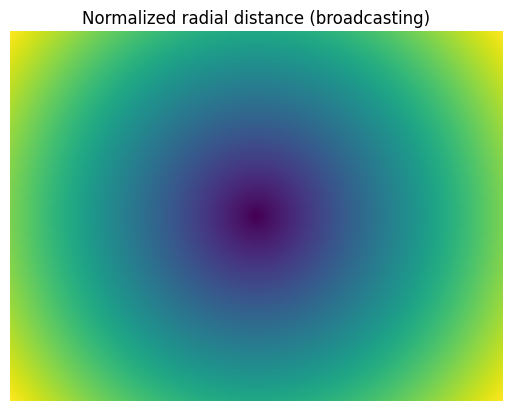

Ring pixels: 20124


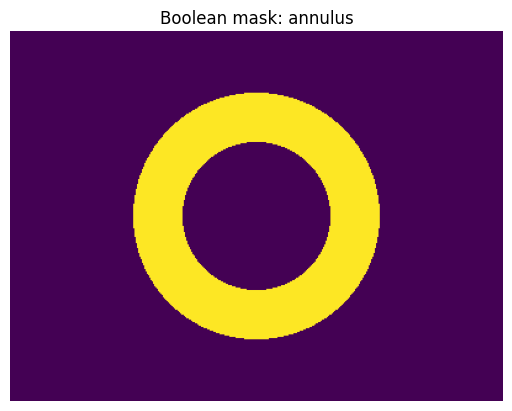

In [ ]:
import numpy as np                #Load NumPy for array math and Matplotlib for visualization.
import matplotlib.pyplot as plt

# Meshgrid and broadcasting: 2D radial distance field
h, w = 300, 400                   #h, w define the image height (300) and width (400) - np.mgrid[0:h, 0:w] creates coordinate grids.
yy, xx = np.mgrid[0:h, 0:w]       #yy contains the row indices (y-coordinates) - xx contains the column indices (x-coordinates).
cx, cy = (w-1)/2.0, (h-1)/2.0     #(cx, cy) is the center of the image
dist = np.sqrt((xx - cx)**2 + (yy - cy)**2) #dist is the Euclidean distance of every pixel from the center → this creates a radial gradient field.

# Normalize to [0,1]
dist01 = (dist - dist.min()) / (dist.max() - dist.min() + 1e-8) #Linearly rescales distances so that the minimum = 0 and maximum = 1.

plt.figure()
plt.imshow(dist01)
plt.title("Normalized radial distance (broadcasting)")
plt.axis('off')
plt.show()
#Displays a radial gradient image going from the center (dark) to the edges (bright).
#Boolean masks: create annulus and count pixels
mask_ring = (dist > 60) & (dist < 100) #mask_ring is True for pixels where the distance is between 60 and 100 (i.e., a ring/annulus).
area = mask_ring.sum()                 #.sum() counts how many pixels satisfy that condition (the area of the ring).
print("Ring pixels:", int(area))
#Displays the ring mask:
#True values appear white.
#False values appear black.
plt.figure()
plt.imshow(mask_ring)
plt.title("Boolean mask: annulus")
plt.axis('off')
plt.show()

* Generates a radial distance field centered in a 300×400 grid.

* Normalizes and visualizes it as a gradient image.

* Uses a boolean mask to select pixels forming a ring (annulus) between radii 60 and 100.

* Counts and displays those pixels as an image.

  



## 2) Monte Carlo π and random walk

Pi estimate: 3.1418


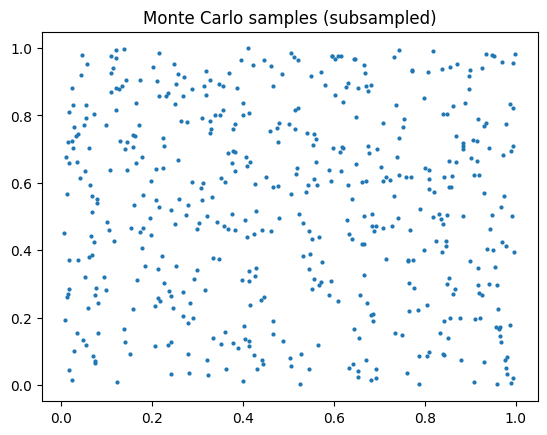

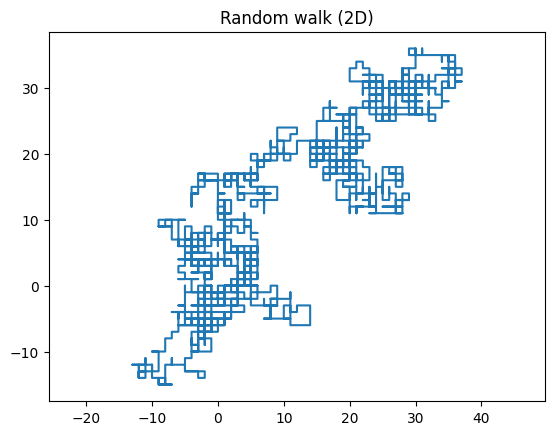

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo Pi: sample points in unit square and test within quarter circle
n = 200_000                                               #Generates 200,000 random points in a unit square [0,1] × [0,1].
pts = np.random.rand(n, 2)  # (x,y) in [0,1]              #Tests if each point lies inside the quarter circle of radius 1 (distance from (0,0) ≤ 1).
inside = (pts[:,0]**2 + pts[:,1]**2) <= 1.0               #Since the area ratio (circle / square) relates to π: π≈4 × points inside circle​ / total points. Prints an estimate of π.
pi_est = 4.0 * inside.mean()
print("Pi estimate:", pi_est)

plt.figure()
plt.scatter(pts[::400,0], pts[::400,1], s=4)              #Plots a subsample of 400 points for visualization. #Output: A scatter plot of random points inside the square. Some fall inside the quarter-circle, some outside.
plt.title("Monte Carlo samples (subsampled)")
plt.show()

# Vectorized 2D random walk
steps = 2000
dirs = np.random.randint(0, 4, size=steps)
delta = np.zeros((steps, 2), dtype=int)                   #Chooses 2000 random steps, each being one of 4 directions.
delta[dirs==0] = [1, 0]
delta[dirs==1] = [-1, 0]
delta[dirs==2] = [0, 1]
delta[dirs==3] = [0, -1]                                  #Maps each random direction to a movement vector.
path = np.cumsum(delta, axis=0)                           #Uses cumsum to compute the path over time (adding up all steps).

plt.figure()
plt.plot(path[:,0], path[:,1])                            #Plots the walk in 2D space.
plt.title("Random walk (2D)")
plt.axis('equal')
plt.show()                                                #Output: A squiggly, random path showing how a particle might wander around step by step.

* Monte Carlo method to estimate π (by sampling points inside a unit square).

* A vectorized 2D random walk (simulating a drunkard’s walk with steps in four directions)

* Tests if each point lies inside the quarter circle of radius 1 (distance from (0,0) ≤ 1).

* Since the area ratio (circle / square) relates to π:

* 𝜋
≈
4
×
points inside circle
total points
π≈4×
total points
points inside circle
	​
* Prints an estimate of π.

## 3) Linear regression from scratch

Weights (normal eq): [6.92060914 2.95783088]


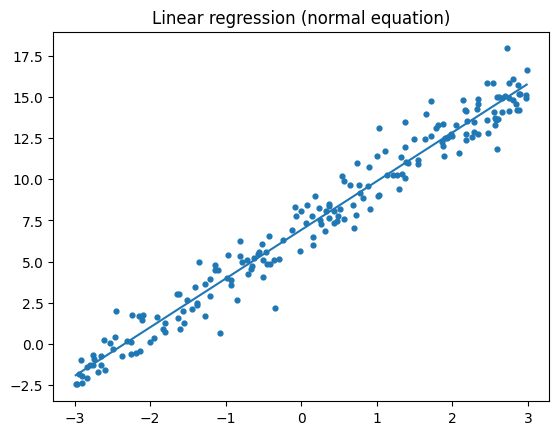

Weights (gradient descent): [6.92060914 2.95783088]


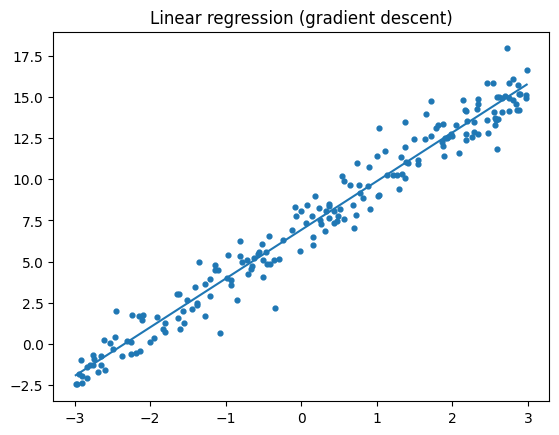

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data: y = 3*x + 7 + noise
rng = np.random.default_rng(0)
x = rng.uniform(-3, 3, 200)                                          # 200 random x values in [-3, 3]
y = 3.0 * x + 7.0 + rng.normal(0, 1.0, 200)                          # true relation y=3x+7 + noise
#Generates fake data following the equation: y=3x+7+noise - This is a classic regression test case.
# Design matrix for y = w0 + w1*x
X = np.vstack([np.ones_like(x), x]).T                                # Builds the design matrix:
                                                                     # Each row is [1, x_i] so we can learn: y=w0​+w1​x
# Normal equation: w = (X^T X)^{-1} X^T y - Solves for weights gives the best-fit line directly.
w = np.linalg.inv(X.T @ X) @ X.T @ y
print("Weights (normal eq):", w)

# Predictions - Plots the data points and the fitted regression line.
y_hat = X @ w

plt.figure()
plt.scatter(x, y, s=12)
plt.plot(np.sort(x), y_hat[np.argsort(x)])
plt.title("Linear regression (normal equation)")
plt.show()

# Gradient descent solution for comparison
w_gd = np.zeros(2)                                                   # Starts from [0, 0] and iteratively updates weights using gradient descent
lr = 0.01                                                            # After enough steps, it converges to nearly the same solution as the normal equation.
for _ in range(2000):
    grad = (2/len(x)) * (X.T @ (X @ w_gd - y))
    w_gd -= lr * grad
print("Weights (gradient descent):", w_gd)

y_hat_gd = X @ w_gd                                                  # Plots the regression line learned by gradient descent.
plt.figure()
plt.scatter(x, y, s=12)
plt.plot(np.sort(x), y_hat_gd[np.argsort(x)])
plt.title("Linear regression (gradient descent)")
plt.show()




*   Implementation of linear regression using both:

*   The Normal Equation (closed-form solution).

*   Gradient Descent (iterative optimization).

*   Generates noisy linear data (y = 3x + 7 + noise).

*   Solves linear regression:

*   Once using the closed-form normal equation.

*   Once using gradient descent.
  



## 4) k-means clustering from scratch

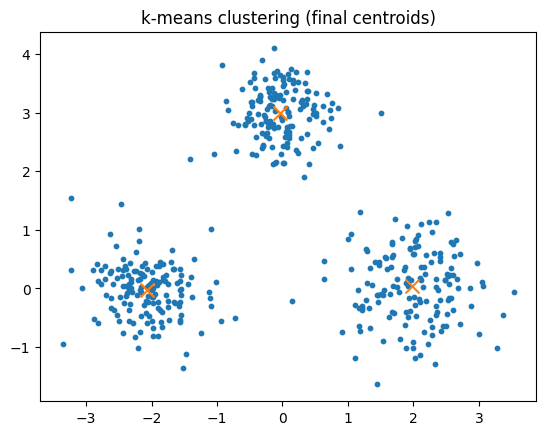

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(1)                                                  # Generates 3 Gaussian clusters of points:
A = rng.normal(loc=[-2, 0], scale=0.5, size=(150,2))                            # A centered near (-2, 0) - B centered near (2, 0) - C centered near (0, 3)
B = rng.normal(loc=[2, 0], scale=0.6, size=(150,2))                             # Each has 150 samples in 2D → total = 450 points - X2 stacks all points together.
C = rng.normal(loc=[0, 3], scale=0.4, size=(150,2))
X2 = np.vstack([A, B, C])

k = 3                                                                           # Chooses k=3 random points from the dataset as the initial cluster centroids.
centroids = X2[rng.choice(len(X2), size=k, replace=False)]

def assign(X, C):                                                               # Uses broadcasting to compute squared distances from each point to each centroid.
    # squared distances via broadcasting
    d2 = ((X[:, None, :] - C[None, :, :])**2).sum(axis=2)                       # Returns the index of the nearest centroid for each point (cluster assignment).
    return np.argmin(d2, axis=1)

for _ in range(20):                                                             # Iterates up to 20 times:
    labels = assign(X2, centroids)                                              # Assigns points to nearest centroid - Recomputes centroids as the mean of points in each cluster - Stops if centroids don’t move much anymore (convergence).
    new_centroids = np.vstack([X2[labels==i].mean(axis=0) for i in range(k)])
    if np.allclose(new_centroids, centroids):
        break
    centroids = new_centroids

plt.figure()
plt.scatter(X2[:,0], X2[:,1], s=10)                                             # Data points (colored the same in this version).
plt.scatter(centroids[:,0], centroids[:,1], s=100, marker='x')                  # Final centroids marked with big “x” markers.
plt.title("k-means clustering (final centroids)")
plt.show()



*   Implements k-means clustering from scratch.

*   Groups the dataset into 3 clusters.

*   Finds and plots the final cluster centroids.
  



## 5) FFT: synthetic signal spectrum

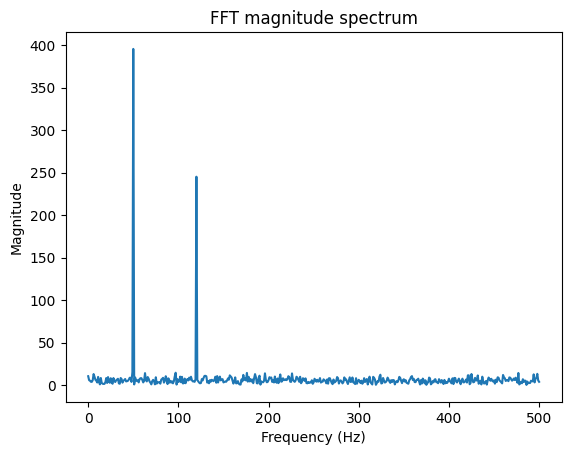

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fs = 1000  # samples per second                                                 # Builds a signal composed of: 50 Hz sine wave - 120 Hz sine wave - white noise
t = np.arange(0, 1.0, 1/fs)                                                     # Sampled at 1000 Hz for 1 second → 1000 samples total.
sig = 0.8*np.sin(2*np.pi*50*t) + 0.5*np.sin(2*np.pi*120*t) + 0.2*np.random.randn(len(t))

F = np.fft.rfft(sig)                                                            # np.fft.rfft(sig) computes the FFT (only positive frequencies).
freqs = np.fft.rfftfreq(len(sig), d=1/fs)                                       # np.fft.rfftfreq gives the corresponding frequency values.
power = np.abs(F)                                                               # np.abs(F) gives the magnitude (power) of each frequency.
plt.figure()
plt.plot(freqs, power)                                                          # X-axis = frequency (Hz).
plt.title("FFT magnitude spectrum")                                             # Y-axis = amplitude magnitude.
plt.xlabel("Frequency (Hz)")                                                    # Shows two strong peaks: Around 50 Hz & Around 120 Hz Plus smaller noise spread across other frequencies.
plt.ylabel("Magnitude")
plt.show()



*   Creates a noisy signal with two sine wave components (50 Hz and 120 Hz).

*   Uses the FFT to convert it from the time domain to the frequency domain.

*   Plots the magnitude spectrum, clearly showing peaks at the signal’s frequencies.

